# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [ ]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

dataset = [X_train, Y_train, X_val, Y_val, X_test, Y_test]

## 1. Algoritmos de Machine Learning para Classificação

### MLP

In [3]:
mlp_model = MLPClassifier(
    max_iter=500,
    random_state=RANDOM_STATE,
    early_stopping=True,
)

In [4]:
param_distributions_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'early_stopping' : [True],
    'n_iter_no_change' : [5, 10, 15]  
}

In [ ]:
result, model, cv, loss, all_cv = runner.search_paramsv2(
    mlp_model, param_distributions_mlp, 'mlp',dataset
)

df=pd.DataFrame((result.values()))
df

Realizando a Busca de Parâmetros por 20 iterações:   0%|          | 0/20 [00:00<?, ?it/s]

,params,score,model_time,accuracy_train,accuracy_val,accuracy_test,f1_score,recall,auc,fpr,tpr,model_path
0,"{'solver': 'adam', 'n_iter_no_change': 5, 'lea...",0.834510,1.648211,0.758773,0.752331,0.763623,0.692379,0.652021,0.746277,"[0.0, 0.15946709729511505, 1.0]","[0.0, 0.6520210896309314, 1.0]",./models/mlp/0.pkl
1,"{'solver': 'adam', 'n_iter_no_change': 10, 'le...",0.846533,1.517108,0.777419,0.769065,0.776052,0.691269,0.614528,0.750946,"[0.0, 0.112636253532499, 1.0]","[0.0, 0.6145284124194493, 1.0]",./models/mlp/1.pkl
2,"{'solver': 'sgd', 'n_iter_no_change': 15, 'lea...",0.841375,11.548523,0.772501,0.760220,0.770315,0.691691,0.631517,0.748742,"[0.0, 0.13403310456197012, 1.0]","[0.0, 0.6315172817809022, 1.0]",./models/mlp/2.pkl
3,"{'solver': 'adam', 'n_iter_no_change': 15, 'le...",0.854238,3.308209,0.786845,0.776237,0.783700,0.705691,0.635618,0.760683,"[0.0, 0.11425111021396851, 1.0]","[0.0, 0.635618043350908, 1.0]",./models/mlp/3.pkl
4,"{'solver': 'adam', 'n_iter_no_change': 15, 'le...",0.841190,4.617917,0.771118,0.762132,0.768164,0.665286,0.564733,0.736545,"[0.0, 0.09164311667339524, 1.0]","[0.0, 0.5647334504979497, 1.0]",./models/mlp/4.pkl
5,"{'solver': 'adam', 'n_iter_no_change': 15, 'le...",0.844857,3.968664,0.771374,0.759981,0.770554,0.692110,0.632103,0.749035,"[0.0, 0.13403310456197012, 1.0]","[0.0, 0.6321031048623316, 1.0]",./models/mlp/5.pkl
6,"{'solver': 'adam', 'n_iter_no_change': 10, 'le...",0.854820,6.267751,0.788331,0.777911,0.779876,0.695134,0.615114,0.754267,"[0.0, 0.1065805409769883, 1.0]","[0.0, 0.6151142355008787, 1.0]",./models/mlp/6.pkl
7,"{'solver': 'adam', 'n_iter_no_change': 10, 'le...",0.841522,2.343694,0.783618,0.771217,0.775096,0.689746,0.612771,0.749865,"[0.0, 0.11303996770286637, 1.0]","[0.0, 0.6127709431751611, 1.0]",./models/mlp/7.pkl
8,"{'solver': 'adam', 'n_iter_no_change': 15, 'le...",0.857686,3.401097,0.785411,0.775759,0.786090,0.707993,0.635618,0.762702,"[0.0, 0.1102139685102947, 1.0]","[0.0, 0.635618043350908, 1.0]",./models/mlp/8.pkl
9,"{'solver': 'adam', 'n_iter_no_change': 10, 'le...",0.837460,1.706920,0.759131,0.750179,0.764101,0.695088,0.659051,0.747773,"[0.0, 0.16350423899878885, 1.0]","[0.0, 0.6590509666080844, 1.0]",./models/mlp/9.pkl


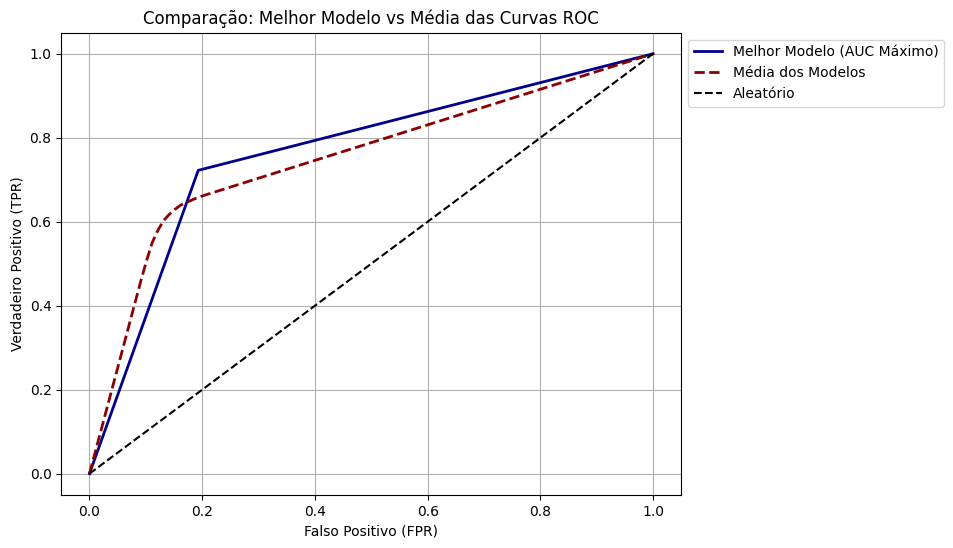

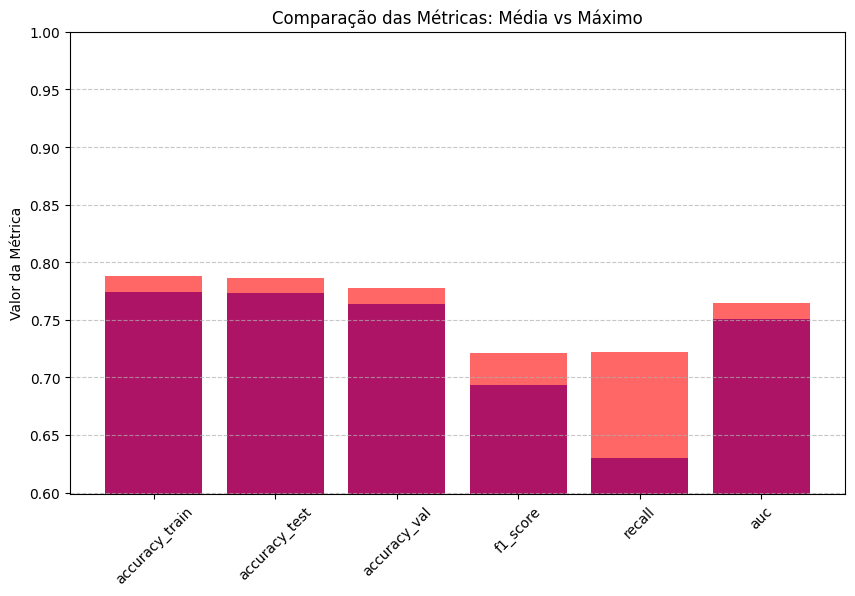

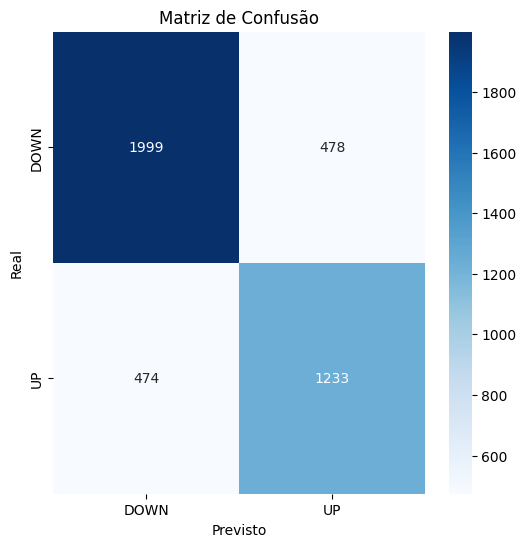

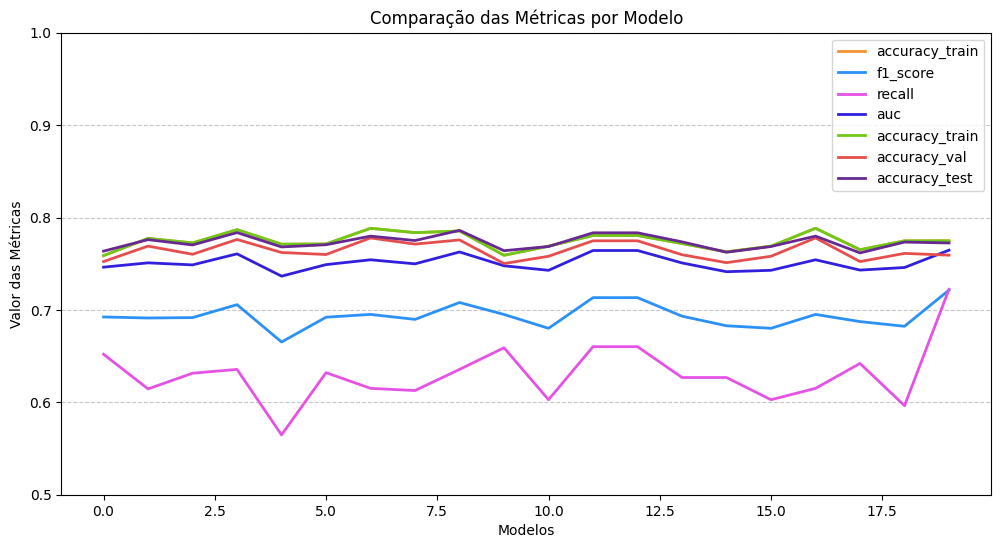

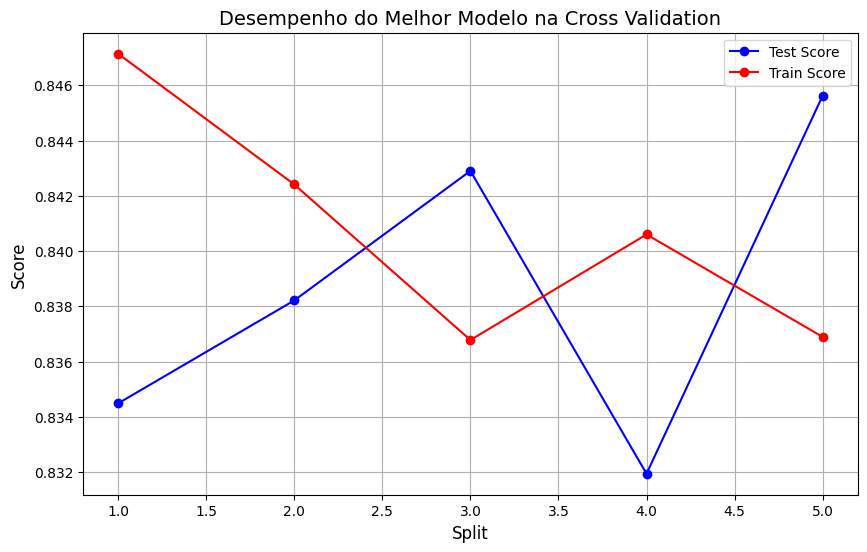

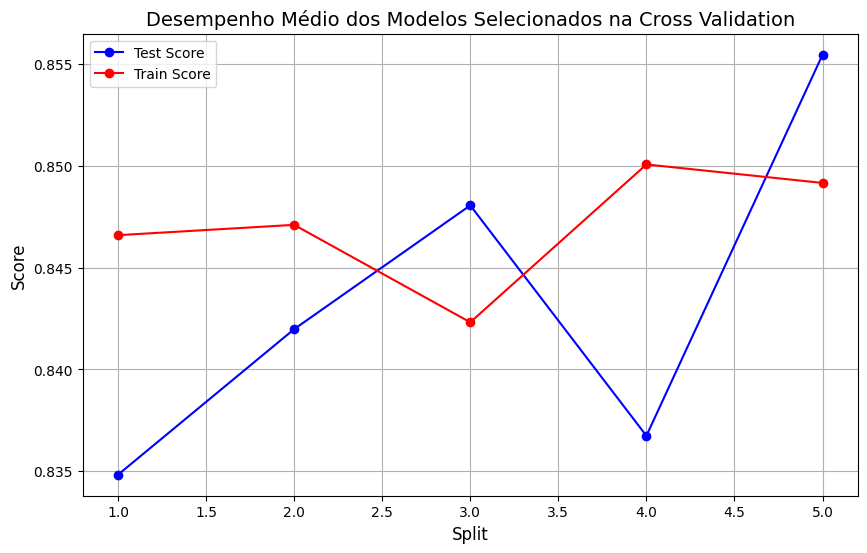

### Resultados do Modelo

**Melhores Parâmetros:**
```
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 15, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 51, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
```

#### Resultados das Métricas:
- **Accuracy train**:
  - **Melhor valor geral**: 0.7883
  - **Média**: 0.7746
  - **Desvio Padrão**: 0.0090
  - **Valor no Modelo Selecionado**: 0.7748

- **Accuracy val**:
  - **Melhor valor geral**: 0.7779
  - **Média**: 0.7641
  - **Desvio Padrão**: 0.0094
  - **Valor no Modelo Selecionado**: 0.7593

- **Accuracy test**:
  - **Melhor valor geral**: 0.7861
  - **Média**: 0.7733
  - **Desvio Padrão**: 0.0074
  - **Valor no Modelo Selecionado**: 0.7725

- **F1 score**:
  - **Melhor valor geral**: 0.7215
  - **Média**: 0.6938
  - **Desvio Padrão**: 0.0130
  - **Valor no Modelo Selecionado**: 0.7215

- **Auc**:
  - **Melhor valor geral**: 0.7647
  - **Média**: 0.7511
  - **Desvio Padrão**: 0.0082
  - **Valor no Modelo Selecionado**: 0.7647

- **Recall**:
  - **Melhor valor geral**: 0.7223
  - **Média**: 0.6304
  - **Desvio Padrão**: 0.0314
  - **Valor no Modelo Selecionado**: 0.7223



In [7]:
from IPython.display import display, Markdown

plots.show_best_roc(df)
plots.show_bar_metrics2(df)
plots.show_confusion_matrix(model, X_test, Y_test)
plots.show_metrics_comparison_line_plot(df, y_min=0.5)
plots.plot_cv_performance(cv, "Desempenho do Melhor Modelo na Cross Validation")
plots.plot_cv_performance(all_cv, "Desempenho Médio dos Modelos Selecionados na Cross Validation")
display(Markdown(util.generate_markdown_report(model, result.values())))

### 1. Visão Geral do Modelo

O modelo **SVM** foi configurado com parâmetros específicos para otimizar sua capacidade de classificação, incluindo o uso do kernel **polinomial**, **C = 100**, e a função de decisão **ovr** (one-vs-rest). Esses parâmetros foram escolhidos com a intenção de melhorar a flexibilidade do modelo, permitindo capturar relações não-lineares complexas nos dados. No entanto, apesar de apresentar uma acurácia de aproximadamente **78%** no conjunto de treinamento, o modelo teve dificuldades em alcançar resultados similares em validação e teste, com uma **acurácia** que não superou **77%** em nenhum dos conjuntos. Isso reflete que o modelo SVM não conseguiu se adaptar bem a todos os dados, apresentando uma performance abaixo de outros modelos testados.

### 2. Sobre a Curva ROC e Matriz de Confusão

A **curva ROC** do modelo SVM mostrou um desempenho moderado, com a área sob a curva (**AUC**) alcançando **0.7559** no melhor modelo. Apesar disso, o modelo não conseguiu melhorar de forma significativa a taxa de verdadeiros positivos (**TPR**), o que pode indicar que a capacidade de discriminação do modelo está abaixo do ideal. A **matriz de confusão** revelou que o modelo cometeu erros significativos ao classificar os dados. Por exemplo, teve uma maior dificuldade em identificar corretamente os casos de **subida**, onde classificou erroneamente como **queda**. Esses erros indicam uma necessidade de ajustes, possivelmente nos hiperparâmetros ou na escolha do kernel.

### 3. Sobre a Variação das Métricas de Desempenho Médio dos Modelos

Em termos de **variação das métricas**, o modelo SVM apresentou **baixa estabilidade** nas métricas de desempenho em comparação com os outros modelos. A **acurácia** de treinamento foi de **78.35%**, mas não conseguiu atingir uma performance superior a **77.65%** em dados de teste e validação. A **média das métricas** também foi consistentemente mais baixa em comparação com os melhores valores, indicando que o modelo teve dificuldades em se ajustar aos dados, principalmente em relação à **precisão** e ao **recall**. O modelo SVM também foi o **mais lento** entre os modelos do scikit-learn, com um tempo de execução de cerca de **240 minutos**, o que pode ser um fator limitante em aplicações práticas, especialmente com grandes volumes de dados.

### 4. Sobre o Desenvolvimento nos K-Folds

Apesar das dificuldades no desempenho geral, o modelo SVM mostrou **boa estabilidade** durante os **K-Folds**. A variação entre os diferentes folds foi pequena, com os valores do melhor modelo variando entre **0.852** e **0.866**, e as métricas médias variando entre **0.834** e **0.848**. Isso indica que, embora o modelo tenha mostrado uma grande **oscillação** nas métricas, ele foi relativamente estável em termos de desempenho, o que sugere que, embora haja uma margem significativa para melhorias, o modelo pode ser adequado para cenários onde alguma variação nos dados é esperada. No entanto, os resultados indicam que ajustes finos, como a seleção de outros kernels ou ajustes de hiperparâmetros, podem ser necessários para melhorar a performance de classificação.

---

### Tabela de Métricas:

| **Métrica**           | **Melhor Valor Geral** | **Média** | **Desvio Padrão** | **Valor no Modelo Selecionado** |
|-----------------------|------------------------|-----------|-------------------|--------------------------------|
| **Accuracy Train**     | 0.7835                 | 0.7712    | 0.0112            | 0.7835                         |
| **Accuracy Val**       | 0.7710                 | 0.7583    | 0.0093            | 0.7710                         |
| **Accuracy Test**      | 0.7765                 | 0.7692    | 0.0088            | 0.7758                         |
| **F1 Score**           | 0.7022                 | 0.6853    | 0.0210            | 0.7022                         |
| **AUC**                | 0.7559                 | 0.7456    | 0.0125            | 0.7559                         |
| **Recall**             | 0.6479                 | 0.6175    | 0.0334            | 0.6479                         |

---

Com isso, temos uma visão completa dos resultados do modelo SVM, com suas respectivas análises e métricas. Se precisar de mais algum ajuste ou detalhamento, estou à disposição!